In [5]:
import numpy as np 
import SC_search
import matplotlib.pyplot as plt
import scienceplots 
import matplotlib
import scipy 
matplotlib.rcParams.update({'font.size': 20})
plt.style.use('science')

In [2]:
year_in_seconds = 365.25*24*60*60
# Frequency series parameters    
frequency_series_dict = {'fmin':0.018,
                                'fmax':0.03,
                                'T_obs':3*year_in_seconds,
                                'downsampling_factor':1000}

# Source parameters
source_parameters = [[28.09555579546043,#mc [sm]
                    0.24710059171597634,#eta
                    150.1*(1.e+6),#D
                    np.pi/4,#beta [rads]
                    2.01,#lambda [rads]
                    2.498091544796509,#inc [rads]
                    -1.851592653589793,#polarization [rads],
                    0,#phi0 [rads]
                    0.018/2,
                    0.01]]#e0 
  


In [3]:
distrbutions_object = SC_search.Stat_distributions.Distributions(frequency_series_dict,source_parameters.copy())

Data contains 1 sources!
Time to merger is:  3.5550937742535975  years
Upper bound on time in band:  2.6438861012726447  years (no eccentricity evolution assumed)
SNR of signal  1  : 12.707387876202993


In [4]:
distrbutions_object.generate_upsilon_statistic_height_plot(num_realisations=1000,num_segments=10)

Computing Upsilons over the FFT grid on many noise realisations is expensive on CPU. Please be patient.


In [6]:
s_s_n = np.loadtxt('ssn.txt')

In [7]:
s_n = np.loadtxt('sn.txt')

In [8]:
num_segments = 10
mu_k = 2 
sigma_k = np.sqrt(2)
injection_SNR = 12.707387876202993

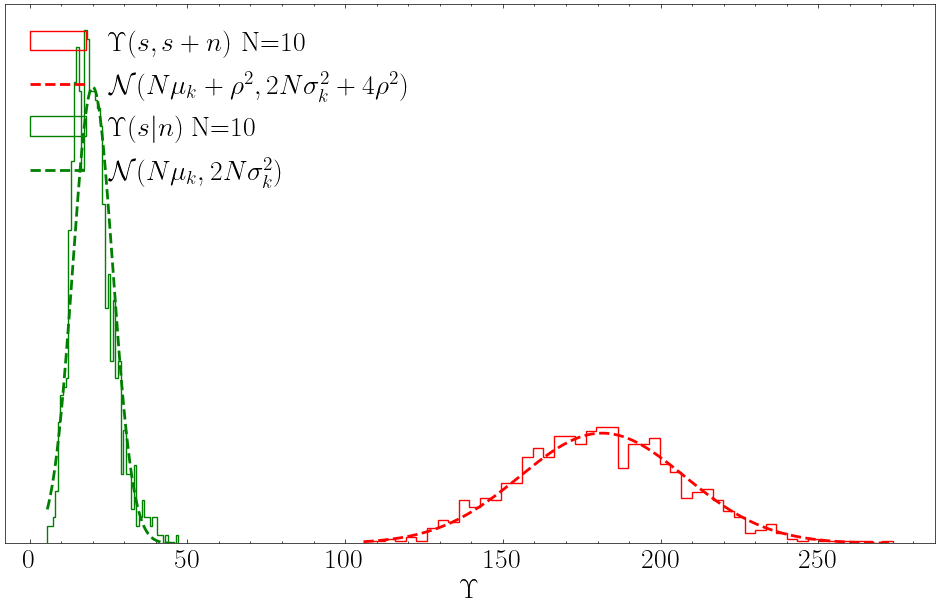

In [9]:
x_range_s_s_n = np.linspace(np.min(s_s_n),np.max(s_s_n),1000)

mu_1 = num_segments*mu_k+injection_SNR**2
sigma_1 = np.sqrt(2*num_segments*sigma_k**2+4*injection_SNR**2)

theoretical_s_s_n= scipy.stats.norm.pdf(x_range_s_s_n,loc = mu_1,scale = sigma_1)


x_range_s_n = np.linspace(np.min(s_n),np.max(s_n),1000)

mu_0 = num_segments*mu_k
sigma_0 = np.sqrt(2*num_segments*sigma_k**2)

theoretical_s_n= scipy.stats.norm.pdf(x_range_s_n,loc = mu_0,scale = sigma_0)


# Plot the distribution of the search statistic
plt.figure(figsize=(12,7))

#  <signal| signal + noise>
plt.hist(s_s_n,density=True,histtype='step',color='r',label=r'$\Upsilon(s,s+n)$ N='+str(num_segments),bins=50)
plt.plot(x_range_s_s_n,theoretical_s_s_n,linestyle='--',label=r'$\mathcal{N}(N\mu_k+\rho^2,2N\sigma_k^2+4\rho^2)$',lw=2,color='r')

# <signal| noise>
plt.hist(s_n,density=True,histtype='step',color='g',label=r'$\Upsilon(s|n)$ N='+str(num_segments),bins=50)
plt.plot(x_range_s_n,theoretical_s_n,linestyle='--',label=r'$\mathcal{N}(N \mu_k,2N\sigma^2_k)$',lw=2,color='g')    

plt.xlabel(r'$\Upsilon$')
plt.yticks([])
plt.legend(loc='upper left')
plt.show()
